<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.175190,-31.681037,9.494153,44.085640,-34.591486
1,0.0,1.0,46.716156,2.131115,58.847271,60.282265,-1.434994
2,0.0,2.0,88.869409,-67.533410,31.335998,104.213923,-72.877925
3,0.0,3.0,74.764794,11.329973,96.094767,89.514248,6.580519
4,0.0,4.0,92.285066,-6.867212,95.417854,107.773683,-12.355830
...,...,...,...,...,...,...,...
249995,999.0,245.0,55.075185,5.603395,70.678580,67.751767,2.926812
249996,999.0,246.0,88.434412,36.584652,135.019064,100.386605,34.632460
249997,999.0,247.0,21.507752,29.178694,60.686446,34.913245,25.773201
249998,999.0,248.0,87.008616,-35.822029,61.186587,98.991769,-37.805183


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.175190,-31.681037,9.494153,44.085640,-34.591486
1,0.0,1.0,46.716156,2.131115,58.847271,60.282265,-1.434994
2,0.0,2.0,88.869409,-67.533410,31.335998,104.213923,-72.877925
3,0.0,3.0,74.764794,11.329973,96.094767,89.514248,6.580519
4,0.0,4.0,92.285066,-6.867212,95.417854,107.773683,-12.355830
...,...,...,...,...,...,...,...
249995,999.0,245.0,55.075185,5.603395,70.678580,67.751767,2.926812
249996,999.0,246.0,88.434412,36.584652,135.019064,100.386605,34.632460
249997,999.0,247.0,21.507752,29.178694,60.686446,34.913245,25.773201
249998,999.0,248.0,87.008616,-35.822029,61.186587,98.991769,-37.805183


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.175190 -31.681037    9.494153   44.085640 -34.591486
      1.0    46.716156   2.131115   58.847271   60.282265  -1.434994
      2.0    88.869409 -67.533410   31.335998  104.213923 -72.877925
      3.0    74.764794  11.329973   96.094767   89.514248   6.580519
      4.0    92.285066  -6.867212   95.417854  107.773683 -12.355830
...                ...        ...         ...         ...        ...
999.0 245.0  55.075185   5.603395   70.678580   67.751767   2.926812
      246.0  88.434412  36.584652  135.019064  100.386605  34.632460
      247.0  21.507752  29.178694   60.686446   34.913245  25.773201
      248.0  87.008616 -35.822029   61.186587   98.991769 -37.805183
      249.0  63.085451  18.053450   91.138901   75.588092  15.550809

[250000 rows x 5 columns]

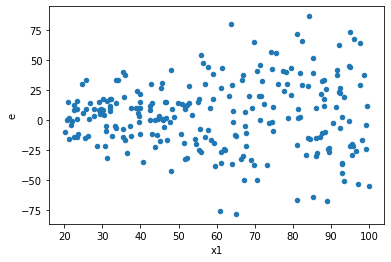

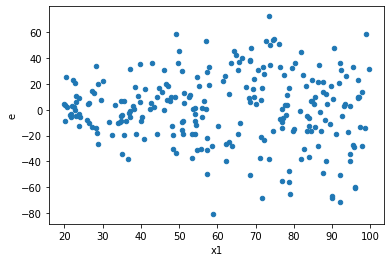

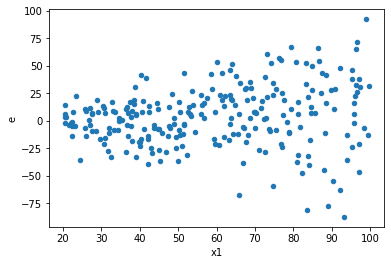

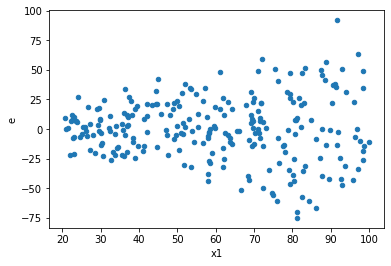

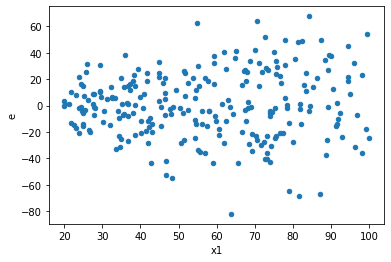

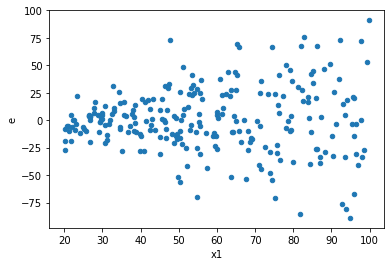

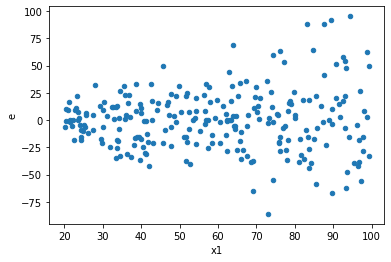

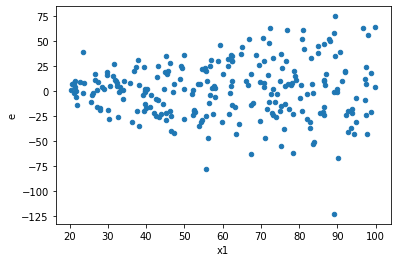

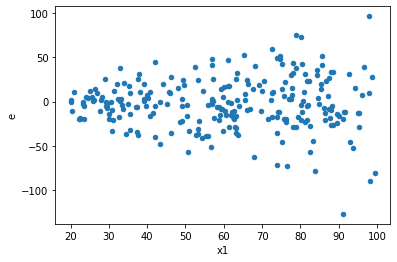

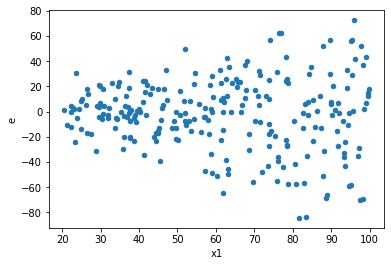

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,127.0,121.0,45575.447195800836,159560.49565753143,358.8617889433137,1318.6817822936482,3.674622996715733,3.3568703372566233e-12,0.9999999999983216,1.6784351686283117e-12,Reject001=0 : Heteroscedasticity
1.0,120.0,128.0,51242.45045499897,127469.18116617079,427.0204204583248,995.8529778607093,2.3320968509933353,3.199380284035769e-06,0.999998400309858,1.5996901420178844e-06,Reject001=0 : Heteroscedasticity
2.0,122.0,126.0,37131.85560071401,146154.65774734828,304.35947213700007,1159.9576011694307,3.8111434253220935,5.759837051755312e-13,0.999999999999712,2.879918525877656e-13,Reject001=0 : Heteroscedasticity
3.0,123.0,125.0,38202.79436708911,135394.33241667127,310.5918241226757,1083.15465933337,3.4873894777911225,1.5372814132774693e-11,0.9999999999923136,7.686407066387346e-12,Reject001=0 : Heteroscedasticity
4.0,126.0,122.0,47497.49017601532,108532.07887627433,376.96420774615336,889.6072039038879,2.3599248565873046,2.7476615827026762e-06,0.9999986261692086,1.3738307913513381e-06,Reject001=0 : Heteroscedasticity
6.0,123.0,125.0,43205.81188282588,149371.7400816904,351.2667632750072,1194.9739206535232,3.401898629725969,3.65143471015017e-11,0.9999999999817428,1.825717355075085e-11,Reject001=0 : Heteroscedasticity
7.0,123.0,125.0,51462.76862516045,142570.73599692277,418.3964928874833,1140.565887975382,2.7260407469096717,4.517814300442069e-08,0.9999999774109285,2.2589071502210345e-08,Reject001=0 : Heteroscedasticity
8.0,106.0,142.0,49128.73655531875,154570.9057969175,463.4786467482901,1088.5275056120952,2.3486033569163802,2.252707724803571e-06,0.9999988736461376,1.1263538624017855e-06,Reject001=0 : Heteroscedasticity
9.0,120.0,128.0,37045.79844367942,158399.26780760975,308.71498703066186,1237.4942797469512,4.0085332158624425,7.216449660063518e-14,0.9999999999999639,3.608224830031759e-14,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,121.0,45575.447195800836,159560.49565753143,358.8617889433137,1318.6817822936482,3.674622996715733,3.3568703372566233e-12,Reject001=0 : Heteroscedasticity
1.0,120.0,128.0,51242.45045499897,127469.18116617079,427.0204204583248,995.8529778607093,2.3320968509933353,3.199380284035769e-06,Reject001=0 : Heteroscedasticity
2.0,122.0,126.0,37131.85560071401,146154.65774734828,304.35947213700007,1159.9576011694307,3.8111434253220935,5.759837051755312e-13,Reject001=0 : Heteroscedasticity
3.0,123.0,125.0,38202.79436708911,135394.33241667127,310.5918241226757,1083.15465933337,3.4873894777911225,1.5372814132774693e-11,Reject001=0 : Heteroscedasticity
4.0,126.0,122.0,47497.49017601532,108532.07887627433,376.96420774615336,889.6072039038879,2.3599248565873046,2.7476615827026762e-06,Reject001=0 : Heteroscedasticity
5.0,114.0,134.0,163033.46625304307,53742.489300093446,1430.1181250266936,401.063352985772,0.28044071742555254,1.876293408894495e-11,Reject001=0 : Heteroscedasticity
6.0,123.0,125.0,43205.81188282588,149371.7400816904,351.2667632750072,1194.9739206535232,3.401898629725969,3.65143471015017e-11,Reject001=0 : Heteroscedasticity
7.0,123.0,125.0,51462.76862516045,142570.73599692277,418.3964928874833,1140.565887975382,2.7260407469096717,4.517814300442069e-08,Reject001=0 : Heteroscedasticity
8.0,106.0,142.0,49128.73655531875,154570.9057969175,463.4786467482901,1088.5275056120952,2.3486033569163802,2.252707724803571e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    998
Reject001=1 : Homoscedasticity        2
Name: Result_test, dtype: int64